In [18]:
import requests
from bs4 import BeautifulSoup

In [19]:
url = "https://www.gutenberg.org/cache/epub/58221/pg58221-images.html"
contenido = requests.get(url).text

In [ ]:
soup = BeautifulSoup(contenido, "html.parser")

In [ ]:
parrafos = soup.find_all("p")

In [ ]:
print(parrafos)

[<p><strong>Title</strong>: La Odisea</p>, <p><strong>Author</strong>: Homer</p>, <p><strong>Illustrator</strong>: John Flaxman</p>, <p style="margin-top:0"><span style="padding-left: 7.5ex"> </span>Walter Paget</p>, <p><strong>Translator</strong>: Luis Segalá y Estalella</p>, <p><strong>Release date</strong>: November 2, 2018 [eBook #58221]</p>, <p><strong>Language</strong>: Spanish</p>, <p><strong>Credits</strong>: Produced by Ramon Pajares Box, Carlos Colon, and the Online<br/>
        Distributed Proofreading Team at http://www.pgdp.net</p>, <p><a class="pginternal" href="#tnote">Nota de transcripción</a></p>, <p><a class="pginternal" href="#Index">Índice de nombres propios</a></p>, <p><a class="pginternal" href="#ToI">Índice de grabados</a></p>, <p><a class="pginternal" href="#ToC">Índice general</a></p>, <p><a class="pginternal" href="#notas">Notas al prólogo</a></p>, <p><span class="pagenum" id="Page_1">[p. 1]</span></p>, <p><span class="pagenum" id="Page_2">[p. 2]</span></p>, <

In [ ]:
h1 = soup.find_all("h1")

In [ ]:
print(h1)

[<h1 class="g1 ws1">LA ODISEA</h1>]


In [ ]:
italicas = soup.find_all("i")

In [ ]:
from collections import Counter

In [ ]:
parrafos = str(soup.find_all("p"))

In [ ]:
print(parrafos.count("Ulises"))

1662


In [ ]:
def buscar_palabra(palabra):
  ocurrencias = str(soup).lower().count(palabra.lower())
  print(f"Encontraste la palabra '{palabra}' {ocurrencias} veces")

In [ ]:
buscar_palabra("Ciclope")
buscar_palabra("Minerva")
buscar_palabra("Alcínoo")
buscar_palabra("CANTO")

Encontraste la palabra 'Ciclope' 82 veces
Encontraste la palabra 'Minerva' 376 veces
Encontraste la palabra 'Alcínoo' 130 veces
Encontraste la palabra 'CANTO' 114 veces


## Algo divertido

In [ ]:
import random

In [ ]:
# 2. Mostrar un pasaje aleatorio de la Odisea
parrafos = soup.find_all("p")
parrafo_aleatorio = random.choice(parrafos).text.strip()

In [20]:
print("\nLee un pasaje aleatorio de la Odisea")
print("-------------------------------------------")
print(parrafo_aleatorio)
print("-------------------------------------------")
print(f"Este párrafo tiene {len(parrafo_aleatorio.split())} palabras.")


Lee un pasaje aleatorio de la Odisea
-------------------------------------------
102 Respondióle Néstor, el
caballero gerenio: «¡Oh amigo! Me traes á la memoria las calamidades
que en aquel pueblo sufrimos los aqueos, indomables por el valor,
unas veces vagando en las na[p.
38]ves por el sombrío ponto hacia donde nos llevara Aquiles
en busca de botín y otras combatiendo alrededor de la gran ciudad
del rey Príamo. Allí recibieron la muerte los mejores capitanes:
allí yace el belicoso Ayax; allí, Aquiles; allí, Patroclo, consejero
igual á los dioses; allí, mi amado hijo fuerte y eximio, Antíloco,
muy veloz en el correr y buen guerrero. Padecimos, además, muchos
infortunios. ¿Cuál de los mortales hombres podría referirlos
totalmente? Aunque, deteniéndote aquí cinco ó seis años, te ocuparas
en preguntar cuántos males padecieron allá los divinos aqueos,
no te fuera posible saberlos todos; sino que, antes de llegar
al término, cansado ya, te irías á tu patria tierra. Nueve años
estuvimos tr

## Visualizaciones interesantes


In [21]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re

In [22]:
import matplotlib.pyplot as plt

In [23]:
# Descarga las stopwords en español
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
# Función para limpiar y tokenizar el texto

def limpiar_texto(texto):
    # 1. Preparar el texto
    # Convertir todo a minúsculas
    texto_minusculas = texto.lower()

    # 2. Eliminar signos de puntuación
    # [^\w\s] significa: eliminar todo lo que no sea letra, número o espacio
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minusculas)

    # 3. Dividir el texto en palabras individuales
    lista_palabras = texto_sin_puntuacion.split()

    # 4. Crear lista para almacenar palabras importantes
    palabras_importantes = []

    # 5. Revisar cada palabra y guardar solo las que no son palabras comunes
    for palabra in lista_palabras:
        if palabra not in stop_words:  # stop_words contiene palabras como "el", "la", "y", etc.
            palabras_importantes.append(palabra)

    return palabras_importantes

# Obtener el texto completo de la página web
texto_completo = soup.get_text()

# Limpiar el texto y obtener lista de palabras importantes
palabras_limpias = limpiar_texto(texto_completo)

# Unir todas las palabras importantes en un solo texto, separadas por espacios
texto_limpio = ' '.join(palabras_limpias)

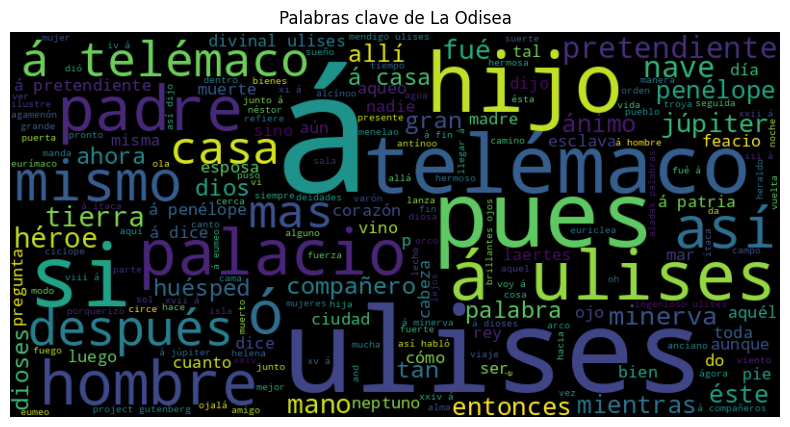

In [25]:
# 4. Nube de palabras mejorada con la forma de un barco griego
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      contour_width=3,
                      contour_color='steelblue').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave de La Odisea')
plt.show()

In [26]:
def limpiar_texto(texto):
    # 1. Definir palabras adicionales a eliminar
    palabras_a_eliminar = {
        'dijo', 'así', 'aunque', 'sino', 'luego', 'pues', 'mientras',
        'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'cap',
        'capítulo', 'verso', 'canto', 'á'  # Añade aquí las palabras que quieras eliminar
    }

    # 2. Combinar stopwords con palabras adicionales a eliminar
    todas_palabras_a_eliminar = stop_words.union(palabras_a_eliminar)

    # 3. Preparar el texto
    texto_minusculas = texto.lower()
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minusculas)
    lista_palabras = texto_sin_puntuacion.split()

    # 4. Crear lista para palabras importantes
    palabras_importantes = []

    # 5. Revisar cada palabra
    for palabra in lista_palabras:
        # Guardar solo si no está en la lista de palabras a eliminar
        if palabra not in todas_palabras_a_eliminar:
            palabras_importantes.append(palabra)

    return palabras_importantes

# Obtener y limpiar el texto
texto_completo = soup.get_text()
palabras_limpias = limpiar_texto(texto_completo)
texto_limpio = ' '.join(palabras_limpias)

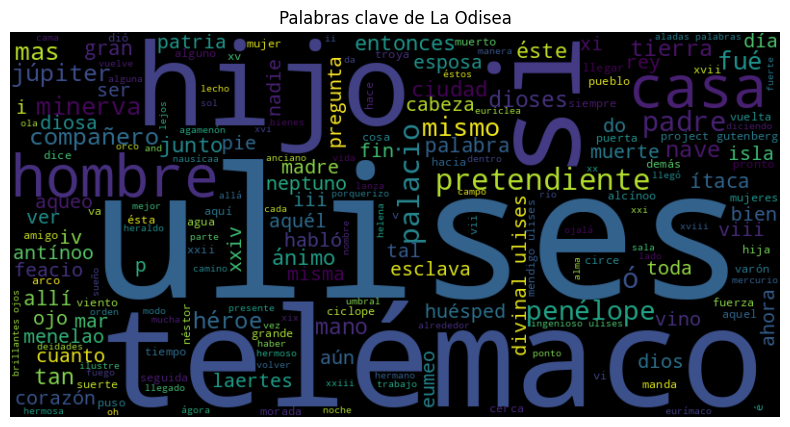

In [27]:
# 4. Nube de palabras mejorada con la forma de un barco griego
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      contour_width=3,
                      contour_color='steelblue').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave de La Odisea')
plt.show()

In [28]:
print(soup.get_text())





      La Odisea, by Homero—A Project Gutenberg eBook
    























The Project Gutenberg eBook of La Odisea
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.
Title: La Odisea

Author: Homer
Illustrator: John Flaxman
 Walter Paget
Translator: Luis Segalá y Estalella

Release date: November 2, 2018 [eBook #58221]
Language: Spanish
Credits: Produced by Ramon Pajares Box, Carlos Colon, and the Online
        Distributed Proofreading Team at http://www.pgdp.net

*** START OF THE PROJECT GUTENBERG EBOOK LA ODISEA ***



Nota de transcripción
Índice de nombres propios
Índice de grabados
Ín